

# Plot the decision surfaces of ensembles of trees on the iris and titanic datasets

Disclaimer, this is an adapted exercise from sklearn, the original can be found [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html#sphx-glr-auto-examples-ensemble-plot-forest-iris-py)

Plot the decision surfaces of forests of randomized trees trained on pairs of
features of the iris dataset.

This plot compares the decision surfaces learned by a decision tree classifier
(first column) and by a random forest classifier (second column).

In the first row, the classifiers are built using the sepal width and
the sepal length features only, while on the second row using the petal length and
sepal length only.

In descending order of quality, when trained (outside of this example) on all
4 features using 30 estimators and scored using 10 fold cross validation,
we see::


    RandomForestClassifier()      # 0.94 score for iris
    DecisionTree(max_depth=None)  # 0.94 score for iris

See the console's output for further details about each model.

In this example you might try to:

1) vary the ``max_depth`` for the ``DecisionTreeClassifier`` , perhaps try ``max_depth=3`` for the
   ``DecisionTreeClassifier``
2) vary ``n_estimators``

It is worth noting that RandomForests can be fitted in parallel
on many cores as each tree is built independently of the others.


%matplotlib inline

In [3]:
print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# hyper Parameters
n_estimators = 50 # try 20
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
titanic = pd.read_csv('./train.csv') 
titanic = titanic[[ 'Age', 'SibSp', 'Fare', 'Pclass', 'Survived']]# 'Sex', 'Parch',  'Cabin', 'Embarked']]
iris = load_iris()



Automatically created module for IPython interactive environment


## Load and Prepare the Data

In [4]:
# prepare the data
titanic.head()
titan = np.array(titanic)

print(titan[1:10,0])
# dealing with missingness
titan[titanic.isnull()]=0
print(titan[1:10,0])

#titan =  titan.astype(float)
print(titan)

[38. 26. 35. 35. nan 54.  2. 27. 14.]
[38. 26. 35. 35.  0. 54.  2. 27. 14.]
[[22.      1.      7.25    3.      0.    ]
 [38.      1.     71.2833  1.      1.    ]
 [26.      0.      7.925   3.      1.    ]
 ...
 [ 0.      1.     23.45    3.      0.    ]
 [26.      0.     30.      1.      1.    ]
 [32.      0.      7.75    3.      0.    ]]


## Establish a suitable plotting procedure

Define a function for plotting the decision boundaries. This is similar to the one that we saw in ‎unit2. Again understanding this procedure is not vital. You should spend time on the next ‎procedure.‎


In [4]:
def plot_boundary(X, y, plot_idx, models, model, model_title):
    plt.subplot(5, 2, plot_idx)
    if plot_idx <= len(models):
        # Add a title at the top of each column
        plt.title(model_title, fontsize=9)

    # Now plot the decision boundary using a fine mesh as input to a
    # filled contour plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Plot either a single DecisionTreeClassifier or alpha blend the decision surfaces of the ensemble of classifiers
    if isinstance(model, DecisionTreeClassifier):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
        # Choose alpha blend level with respect to the number of estimators that are in use
        estimator_alpha = 1.0 / len(model.estimators_)
        for tree in model.estimators_:
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    # Build a coarser grid to plot a set of ensemble classifications
    # to show how these are different to what we see in the decision
    # surfaces. These points are regularly space and do not have a
    # black outline
    xx_coarser, yy_coarser = np.meshgrid(
        np.arange(x_min, x_max, plot_step_coarser),
        np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                     yy_coarser.ravel()]
                                     ).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolors="none")

    # Plot the training points, these are clustered together and have a
    # black outline
    plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap=ListedColormap(['r', 'y', 'b']),
                edgecolor='k', s=20)


## Compare Random Forest with a Decision Trees Classifiers
Create two models, train them on one of the two datasets and plot them for comparison. The first model is a decision tree and the second is an ensemble random forest of n_estimators.


DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with features [0, 1] has a score of 0.9266666666666666 with 50 estimators
DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with features [0, 2] has a score of 0.9933333333333333 with 50 estimators
DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with features [2, 3] has a score of 0.9933333333333333 with 50 estimators
DecisionTree with features [1, 2] has a score of 0.9866666666666667
RandomForest with features [1, 2] has a score of 0.9866666666666667 with 50 estimators
DecisionTree with features [1, 3] has a score of 0.98
RandomForest with features [1, 3] has a score of 0.98 with 50 estimators


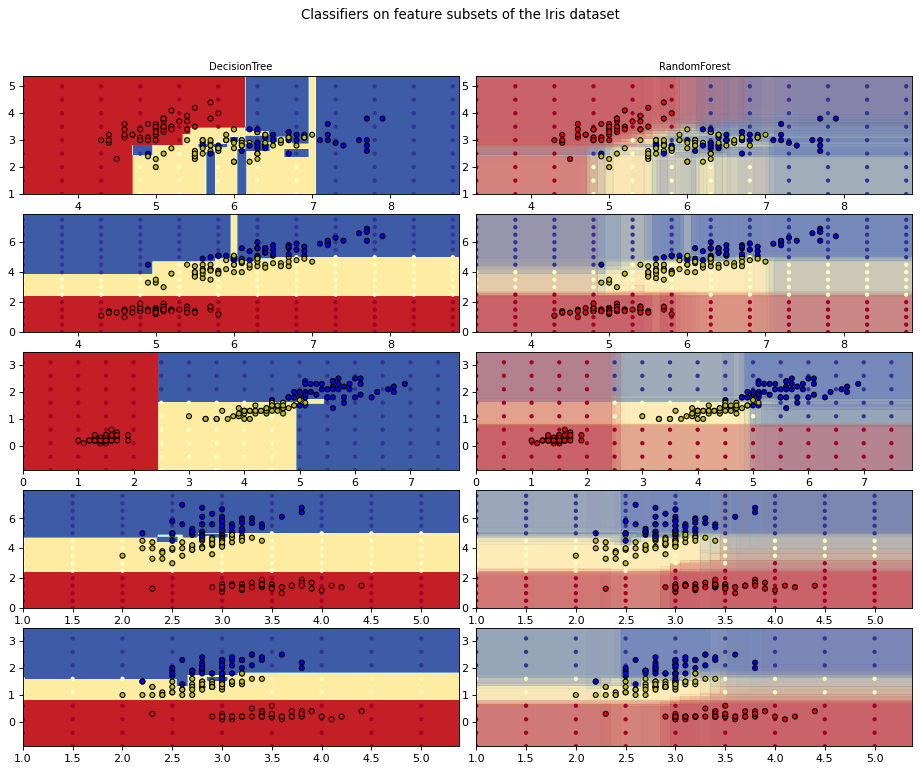

In [5]:
def apply_DecTree_RandForest(dataname = 'titan'):
    plot_idx = 1

    models = [DecisionTreeClassifier(max_depth=None),
              RandomForestClassifier(n_estimators=n_estimators)]
    plt.figure(figsize=(12, 10), dpi=80)
    for pair in ([0, 1], [0, 2], [2, 3], [1,2], [1,3]):  # we are selecting only paris to be able to plot in 2d but you can add ore than two fectures if you diable the plotting
        for model in models:
            # We only take the two corresponding features
            if dataname=='iris':
                # apply decision trees and random forest on the iris
                X = iris.data[:, pair]
                y = iris.target
            else:
                # uncomment to apply decision trees and random forest on the titanic
                X = titan[:, pair] 
                y = titan[:,-1]

            # Shuffle
            idx = np.arange(X.shape[0])
            np.random.seed(RANDOM_SEED)
            np.random.shuffle(idx)
            X = X[idx]
            y = y[idx]

            # Standardize
            #mean = X.mean(axis=0)
            #std = X.std(axis=0)
            #X = (X - mean) / std

            # Train
            model.fit(X, y)

            scores = model.score(X, y)
            # Create a title for each column and the console by using str() and
            # slicing away useless parts of the string
            model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]

            model_details = model_title
            model_details += " with features {} has a score of {}".format( pair, scores)
            if hasattr(model, "estimators_"):
                model_details += " with {} estimators".format(len(model.estimators_))
            print(model_details)
            
            plot_it = True
            if plot_it:
                plot_boundary(X, y, plot_idx, models, model, model_title)
                plot_idx += 1  # move on to the next plot in sequence


    plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
    plt.axis("tight")
    plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
    plt.show()
    
#apply_DecTree_RandForest(dataname = 'titan')
apply_DecTree_RandForest(dataname = 'iris')